In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2023-12-03 21:41:52.316404: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-03 21:41:52.342587: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-03 21:41:52.342608: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-03 21:41:52.343318: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-03 21:41:52.347543: I tensorflow/core/platform/cpu_feature_guar

Num GPUs Available:  0


2023-12-03 21:41:53.147565: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-03 21:41:53.170714: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [2]:
# 4.1 Loading the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print(f'Train data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')

Train data shape: (25000,)
Test data shape: (25000,)


In [4]:
#4.2 decoding reviews back to text
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [5]:
# 4.3 encoding the integer sequences via multi-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
# 4.4 model definition
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [7]:
# 4.5 compiling the model
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [8]:
# 4.6 setting aside a validations set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
# 4.7 training your model
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5712 - accuracy: 0.7471 - val_loss: 0.4409 - val_accuracy: 0.8631
Epoch 2/20
30/30 [==============================] - 0s 6ms/step - loss: 0.3510 - accuracy: 0.8881 - val_loss: 0.3321 - val_accuracy: 0.8811
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2499 - accuracy: 0.9200 - val_loss: 0.2937 - val_accuracy: 0.8849
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1985 - accuracy: 0.9356 - val_loss: 0.2881 - val_accuracy: 0.8848
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1640 - accuracy: 0.9493 - val_loss: 0.2925 - val_accuracy: 0.8814
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1374 - accuracy: 0.9575 - val_loss: 0.2923 - val_accuracy: 0.8827
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1166 - accuracy: 0.9646 - val_loss: 0.3045 - val_accuracy: 0.8847
Epoch 8/20
30/30 [=

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

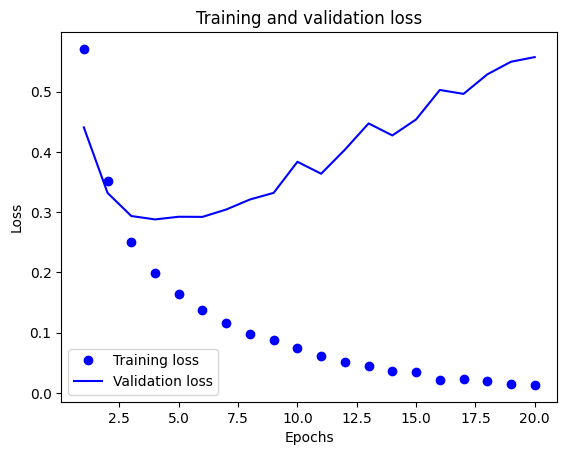

In [11]:
# 4.8 Plotting the training and validation loss
import matplotlib.pyplot as plt 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

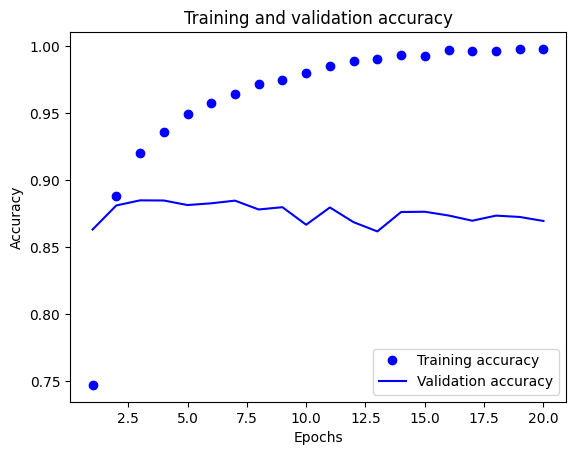

In [12]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# 4.10 retaining the model from scratch

model.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512
)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 0s 4ms/step - loss: 0.0082 - accuracy: 0.9995
Epoch 2/4
30/30 [==============================] - 0s 4ms/step - loss: 0.0095 - accuracy: 0.9990
Epoch 3/4
30/30 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9975
Epoch 4/4
782/782 [==============================] - 0s 611us/step - loss: 0.6989 - accuracy: 0.8562


[0.6988796591758728, 0.8561599850654602]

In [14]:
model.predict(x_test)

782/782 [==============================] - 0s 573us/step


array([[0.01113547],
       [1.        ],
       [0.9729759 ],
       ...,
       [0.0041396 ],
       [0.00456427],
       [0.9388305 ]], dtype=float32)

In [16]:
# Loading the reuters dataset
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [17]:
print(len(train_data), len(test_data))

8982 2246


In [18]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [22]:
# 4.12 Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_newswire = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [23]:
# 4.13 Ebcoding the input data
x_train = vectorize_sequences(train_data)
x__test = vectorize_sequences(test_data)

In [25]:
# 4.14 encoding the labels

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
# note that the above is already built into keras
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
# 4.15 model definition 

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax'),
])

In [29]:
# 4.16 compiling the model
model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [30]:
# 4.17 setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [31]:
# 4.18 Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 13ms/step - loss: 2.7821 - accuracy: 0.4491 - val_loss: 1.9198 - val_accuracy: 0.6040
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 1.5954 - accuracy: 0.6698 - val_loss: 1.4082 - val_accuracy: 0.6980
Epoch 3/20
16/16 [==============================] - 0s 7ms/step - loss: 1.2099 - accuracy: 0.7337 - val_loss: 1.2162 - val_accuracy: 0.7440
Epoch 4/20
16/16 [==============================] - 0s 7ms/step - loss: 0.9830 - accuracy: 0.7930 - val_loss: 1.1080 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 0s 7ms/step - loss: 0.8200 - accuracy: 0.8267 - val_loss: 1.0170 - val_accuracy: 0.7850
Epoch 6/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6808 - accuracy: 0.8539 - val_loss: 0.9609 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 7ms/step - loss: 0.5723 - accuracy: 0.8809 - val_loss: 0.9462 - val_accuracy: 0.8080
Epoch 8/20
16/16 [=

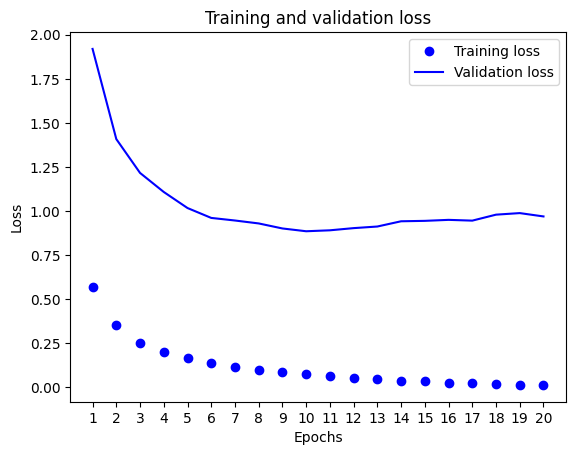

In [37]:
# 4.19 plotting the training and validation loss
loss = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.show()

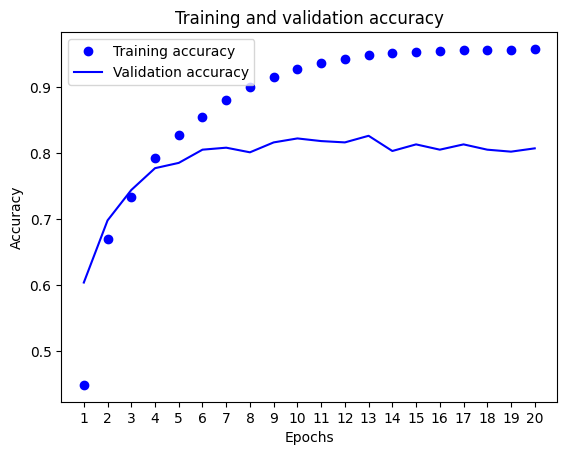

In [38]:
# 4.20 Plotting the training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.show()

In [40]:
# 4.21 retraing the model from scratch
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax'),
])
model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model.fit(
            x_train,
            y_train,
            epochs=9,
            batch_size=512)
results = model.evaluate(x__test, y_test)
results

Epoch 1/9
18/18 [==============================] - 0s 6ms/step - loss: 2.6679 - accuracy: 0.5070
Epoch 2/9
18/18 [==============================] - 0s 5ms/step - loss: 1.4820 - accuracy: 0.6908
Epoch 3/9
18/18 [==============================] - 0s 5ms/step - loss: 1.1337 - accuracy: 0.7502
Epoch 4/9
18/18 [==============================] - 0s 5ms/step - loss: 0.9254 - accuracy: 0.8031
Epoch 5/9
18/18 [==============================] - 0s 6ms/step - loss: 0.7646 - accuracy: 0.8375
Epoch 6/9
18/18 [==============================] - 0s 6ms/step - loss: 0.6321 - accuracy: 0.8671
Epoch 7/9
18/18 [==============================] - 0s 5ms/step - loss: 0.5275 - accuracy: 0.8859
Epoch 8/9
18/18 [==============================] - 0s 6ms/step - loss: 0.4409 - accuracy: 0.9093
Epoch 9/9
71/71 [==============================] - 0s 776us/step - loss: 0.9256 - accuracy: 0.7876


[0.9256188273429871, 0.7876224517822266]

In [42]:
# Checking what a reandom representation would be
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18833481745325023

In [44]:
# Generating predicitons on new data
predictions = model.predict(x_test)
print(predictions[0])
predictions[0].shape

782/782 [==============================] - 1s 693us/step
[0.00980667 0.07488621 0.0149387  0.05431638 0.04524244 0.01056062
 0.01599994 0.00479384 0.06254993 0.00695316 0.03496384 0.01068955
 0.03037963 0.01175285 0.02162772 0.00455416 0.06665867 0.01970998
 0.01409628 0.08366666 0.17036317 0.0223627  0.01166311 0.00866141
 0.01597998 0.00698809 0.01121769 0.00338373 0.01000442 0.00462133
 0.01155667 0.02285357 0.00605086 0.00481813 0.00804799 0.00891983
 0.01226298 0.00958068 0.00501738 0.00977176 0.01405429 0.00593331
 0.00296397 0.00977645 0.00171548 0.00328363]


(46,)

In [47]:
np.argmax(predictions[0])

20

In [49]:
# 4.22 A model with an information bottleneck
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(46, activation='softmax'),
])
model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model.fit(
            x_train,
            y_train,
            epochs=20,
            batch_size=512,
            validation_data=(x_val, y_val))
results = model.evaluate(x__test, y_test)
results

Epoch 1/20
18/18 [==============================] - 0s 12ms/step - loss: 3.8107 - accuracy: 0.2631 - val_loss: 3.7807 - val_accuracy: 0.0540
Epoch 2/20
18/18 [==============================] - 0s 7ms/step - loss: 3.7195 - accuracy: 0.0539 - val_loss: 3.6260 - val_accuracy: 0.0400
Epoch 3/20
18/18 [==============================] - 0s 7ms/step - loss: 3.5586 - accuracy: 0.1974 - val_loss: 3.4369 - val_accuracy: 0.2980
Epoch 4/20
18/18 [==============================] - 0s 7ms/step - loss: 3.3600 - accuracy: 0.2871 - val_loss: 3.2274 - val_accuracy: 0.5190
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 3.1392 - accuracy: 0.5333 - val_loss: 2.9911 - val_accuracy: 0.5740
Epoch 6/20
18/18 [==============================] - 0s 7ms/step - loss: 2.9157 - accuracy: 0.5556 - val_loss: 2.7705 - val_accuracy: 0.5860
Epoch 7/20
18/18 [==============================] - 0s 7ms/step - loss: 2.7080 - accuracy: 0.5645 - val_loss: 2.5781 - val_accuracy: 0.5950
Epoch 8/20
18/18 [=

[1.3099039793014526, 0.7034728527069092]